In [1]:
import pandas as pd

## Ingestion

In [2]:
df = pd.read_csv('../data/Food_Inspections.csv')
df.head()

,Inspection ID,DBA Name,AKA Name,License #,Facility Type,Risk,Address,City,State,Zip,Inspection Date,Inspection Type,Results,Violations,Latitude,Longitude,Location
0,2472391,PHILZ COFFEE,PHILZ COFFEE,2766979.0,NaN,Risk 2 (Medium),1555 N WELLS ST,CHICAGO,IL,60610.0,01/07/2021,License,Not Ready,NaN,41.910736,-87.634551,"(-87.63455069145124, 41.910736031820235)"
1,2453551,BIAN,BIAN,2744753.0,Restaurant,Risk 1 (High),600 W CHICAGO AVE,CHICAGO,IL,60654.0,10/20/2020,License,Pass,NaN,41.896585,-87.642996,"(-87.64299618172501, 41.896585191199556)"
2,2386633,JIN JU,JIN JU,27137.0,Restaurant,Risk 1 (High),5203 N CLARK ST,CHICAGO,IL,60640.0,08/28/2020,Canvass,No Entry,NaN,41.976301,-87.668276,"(-87.66827593789948, 41.97630115368914)"
3,2386595,LA BIZNAGA #2,LA BIZNAGA #2,2708992.0,NaN,Risk 1 (High),2949 W BELMONT AVE,CHICAGO,IL,60618.0,08/27/2020,Complaint,No Entry,NaN,41.939256,-87.702270,"(-87.70226967930802, 41.939255926667535)"
4,2386523,MC DONALD'S,MC DONALD'S,2560785.0,Restaurant,Risk 2 (Medium),6336 S ASHLAND AVE,CHICAGO,IL,60636.0,08/26/2020,Short Form Complaint,Pass,NaN,41.778361,-87.664337,"(-87.66433686342792, 41.77836097603761)"


## EDA y Limpieza

In [3]:
df.shape

(215130, 17)

In [4]:
import re

def standarize_column_names(df):
    names = {}
    for column in df.columns:
        std_name = column.lower()
        std_name = re.sub('[#]', '', std_name)
        std_name = re.sub(' $', '', std_name)
        std_name = re.sub(' ', '_', std_name)
        names[column] = std_name
        
    return df.rename(columns=names)

In [5]:
df = standarize_column_names(df)

In [6]:
def get_datatypes(df):
    types_df  = pd.DataFrame(df.dtypes)
    types_df.columns = ['dtype'] 
    return types_df

In [7]:
get_datatypes(df)

,dtype
inspection_id,int64
dba_name,object
aka_name,object
license,float64
facility_type,object
risk,object
address,object
city,object
state,object
zip,float64


In [8]:
duplicate_rows_df = df[df.duplicated()]
print("Number of duplicate rows: ", duplicate_rows_df.shape[0])

Number of duplicate rows:  0


In [9]:
def count_nunique(df):
    # getting number of unique vales
    nunique_df = df.nunique()
    nunique_df = pd.DataFrame(data=nunique_df)
    nunique_df.columns = ['unique_observations']
    
    nunique_df['percentage'] = (nunique_df.unique_observations / df.shape[0]) * 100
    nunique_df.percentage = round(nunique_df.percentage, 2)
    
    # formatting numeric values with commas
    nunique_df.unique_observations = nunique_df.unique_observations.map('{:,}'.format)
    nunique_df = pd.DataFrame(data=nunique_df)
    
    return nunique_df

In [10]:
count_nunique(df)

,unique_observations,percentage
inspection_id,"215,130",100.00
dba_name,"28,753",13.37
aka_name,"27,360",12.72
license,"39,111",18.18
facility_type,500,0.23
risk,4,0.00
address,"18,525",8.61
city,70,0.03
state,4,0.00
zip,112,0.05


In [11]:
def count_missing_values(df):
    #counting missing observations
    na_df = pd.DataFrame(df.isnull().sum())
    na_df.columns = ['missing_observations']
    
    na_df['percentage'] = (na_df.missing_observations / df.shape[0]) * 100
    na_df.percentage = round(na_df.percentage, 2)
    
    # formatting numeric values with commas
    na_df.missing_observations = na_df.missing_observations.map('{:,}'.format)
    na_df = pd.DataFrame(data=na_df)
    
    return na_df

In [12]:
count_missing_values(df)

,missing_observations,percentage
inspection_id,0,0.00
dba_name,0,0.00
aka_name,"2,487",1.16
license,17,0.01
facility_type,"4,892",2.27
risk,69,0.03
address,0,0.00
city,158,0.07
state,50,0.02
zip,52,0.02


In [13]:
df = df.dropna(subset=['risk', 'city', 'state', 'zip', 'inspection_type'])
count_missing_values(df)

,missing_observations,percentage
inspection_id,0,0.00
dba_name,0,0.00
aka_name,"2,440",1.14
license,17,0.01
facility_type,"4,832",2.25
risk,0,0.00
address,0,0.00
city,0,0.00
state,0,0.00
zip,0,0.00


In [14]:
dropped_columns = ['inspection_id', 'dba_name', 'aka_name', 'license', 'address', 'inspection_date', 'violations']
df = df.drop(dropped_columns, axis=1)
df.head()

,facility_type,risk,city,state,zip,inspection_type,results,latitude,longitude,location
0,NaN,Risk 2 (Medium),CHICAGO,IL,60610.0,License,Not Ready,41.910736,-87.634551,"(-87.63455069145124, 41.910736031820235)"
1,Restaurant,Risk 1 (High),CHICAGO,IL,60654.0,License,Pass,41.896585,-87.642996,"(-87.64299618172501, 41.896585191199556)"
2,Restaurant,Risk 1 (High),CHICAGO,IL,60640.0,Canvass,No Entry,41.976301,-87.668276,"(-87.66827593789948, 41.97630115368914)"
3,NaN,Risk 1 (High),CHICAGO,IL,60618.0,Complaint,No Entry,41.939256,-87.702270,"(-87.70226967930802, 41.939255926667535)"
4,Restaurant,Risk 2 (Medium),CHICAGO,IL,60636.0,Short Form Complaint,Pass,41.778361,-87.664337,"(-87.66433686342792, 41.77836097603761)"


In [15]:
def standarize_column_strings(data, columns, excluded_punctuation=".,-*¿?¡!/\(\)"):
    for col in columns:
        data[col] = data[col].apply(lambda x: x.lower().replace(" ", "_"))
        for ch in excluded_punctuation:
            data[col] = data[col].apply(lambda x: x.replace(ch, ""))
    
def replace_column_value(data, column, search_string, replace_string):
    data[column] = data[column].apply(lambda x: x.replace(search_string, replace_string))
    
def replace_column_values(data, column, replace_dict):
    for key, value in replace_dict.items():
        replace_column_value(data, column, key, value)

In [16]:
standarize_column_strings(df, ['risk', 'city', 'state', 'inspection_type', 'results'])

In [17]:
count_nunique(df)

,unique_observations,percentage
facility_type,496,0.23
risk,4,0.00
city,64,0.03
state,4,0.00
zip,112,0.05
inspection_type,98,0.05
results,7,0.00
latitude,"17,199",8.00
longitude,"17,199",8.00
location,"17,199",8.00


In [18]:
replace_dict = {
    'chchicago': 'chicago',
    'cchicago': 'chicago',
    'chicagochicago': 'chicago',
    '312chicago': 'chicago',
    'chicagobedford_park': 'bedford_park',
    'chicagohicago': 'chicago',
    'chcicago': 'chicago',
    'chicagoi': 'chicago',
    'oolympia_fields': 'olympia_fields'
}

replace_column_values(df, 'city', replace_dict)

In [19]:
replace_column_values(df, 'risk', {
    'risk_1_high': 'high',
    'risk_2_medium': 'medium',
    'risk_3_low': 'low'
})

df.risk.unique()

array(['medium', 'high', 'low', 'all'], dtype=object)

In [20]:
df = df.astype({
    'facility_type': 'category',
    'risk': 'category',
    'city': 'category',
    'state': 'category',
    'zip': 'int64',
    'inspection_type': 'category',
    'results': 'category'
});

In [21]:
get_datatypes(df)

,dtype
facility_type,category
risk,category
city,category
state,category
zip,int64
inspection_type,category
results,category
latitude,float64
longitude,float64
location,object


## GEDA

### Funciones auxiliares

In [22]:
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib.ticker import FuncFormatter


sns.set_context('talk')

In [23]:
def number_formatter_i(number, pos = None):
    """Convert a number into a human readable format."""
    magnitude = 0
    while abs(number) >= 1000:
        magnitude += 1
        number /= 1000
    return '%d%s' % (number, ['', 'K', 'M', 'B', 'T', 'Q'][magnitude])

In [24]:
def number_formatter_f(number, pos = None):
    """Convert a number into a human readable format."""
    magnitude = 0
    while abs(number) >= 1000:
        magnitude += 1
        number /= 1000
    return '%.1f%s' % (number, ['', 'K', 'M', 'B', 'T', 'Q'][magnitude])

### Gráficas

In [25]:
def value_counts_report(df, column, sort_by_values=True, ascending=False):
    count = df[column].value_counts()
    count_df = pd.DataFrame(data={column: count.index, 'observations': count.values})
    
    if sort_by_values:
        count_df.sort_values(by=['observations'], inplace=True, ignore_index=True, ascending=ascending)
    else:
        count_df.sort_values(by=[column], inplace=True, ignore_index=True, ascending=ascending)
        
    return count_df

In [26]:
value_counts_report(df, 'results', sort_by_values=True, ascending=False)

,results,observations
0,pass,112548
1,fail,41463
2,pass_w_conditions,32525
3,out_of_business,18684
4,no_entry,7327
5,not_ready,2259
6,business_not_located,62


In [27]:
results_count = value_counts_report(df, 'results')
results_count

,results,observations
0,pass,112548
1,fail,41463
2,pass_w_conditions,32525
3,out_of_business,18684
4,no_entry,7327
5,not_ready,2259
6,business_not_located,62


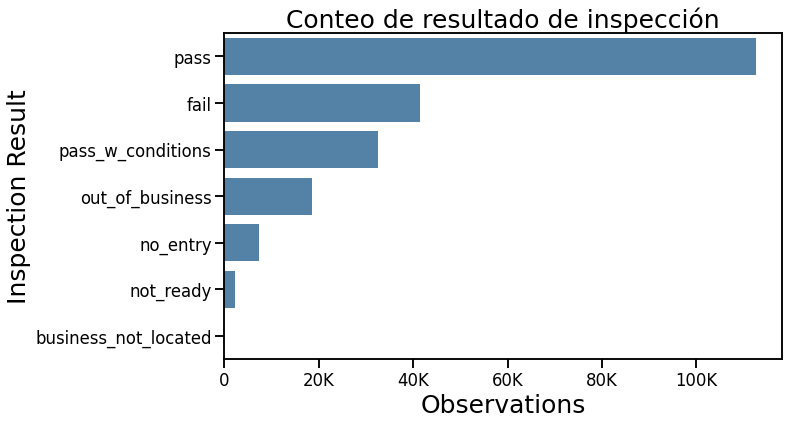

In [28]:
plt.figure(figsize=(10,6))
ax = sns.barplot(x='observations', 
                 y="results", 
                 data=results_count,
                 color='steelblue',
                 order=results_count.sort_values('observations',ascending=False).results)
# set labels
plt.xlabel("Observations", size=25)
plt.ylabel("Inspection Result", size=25)
plt.title("Conteo de resultado de inspección", size=25)
ax.xaxis.set_major_formatter(FuncFormatter(number_formatter_i))

In [29]:
replace_dict = {
    'pass_w_conditions': 'pass',
    'out_of_business': 'pass',
    'no_entry': 'pass',
    'not_ready': 'pass',
}

replace_column_values(df, 'results', replace_dict)

In [36]:
df = df[df.results != 'business_not_located']
results_count = value_counts_report(df, "results")
results_count

,results,observations
0,pass,173343
1,fail,41463


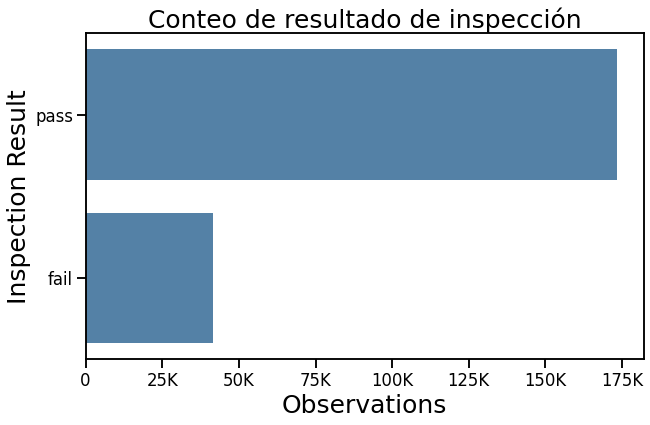

In [37]:
plt.figure(figsize=(10,6))
ax = sns.barplot(x='observations', 
                 y="results", 
                 data=results_count,
                 color='steelblue',
                 order=results_count.sort_values('observations',ascending=False).results)
# set labels
plt.xlabel("Observations", size=25)
plt.ylabel("Inspection Result", size=25)
plt.title("Conteo de resultado de inspección", size=25)
ax.xaxis.set_major_formatter(FuncFormatter(number_formatter_i))

<AxesSubplot:xlabel='longitude', ylabel='latitude'>

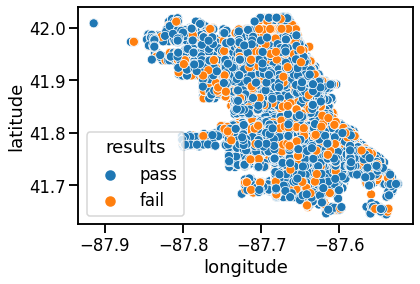

In [39]:
sns.scatterplot(data=df, x='longitude',  y='latitude', hue='results')